In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [4]:
chd_df=pd.read_csv("E:\\SLIIT\\4 year\\1 Sem\ML\\Assignment\\Assignment 2\\framingham.csv")
chd_df.drop(['education'],axis=1,inplace=True)
chd_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
chd_df.rename(columns={'male':'sex_male'},inplace=True)

In [6]:
chd_df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
count=0
for i in chd_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values =', count)
print('Percentage of rows with missing values in the dataset =',round((count/len(chd_df.index))*100),'%')
print('Therefore, the missing values are eliminated.')


Total number of rows with missing values = 489
Percentage of rows with missing values in the dataset = 12 %
Therefore, the missing values are eliminated.


In [8]:
chd_df.dropna(axis=0,inplace=True)

In [9]:
def draw_chd_histograms(dataframe, features, rows, cols):
    fig_chd=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax_chd=fig_chd.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax_chd,facecolor='maroon')
        ax_chd.set_title(feature+" Visualization",color='navy')
        
    fig_chd.tight_layout()  
    plt.show()

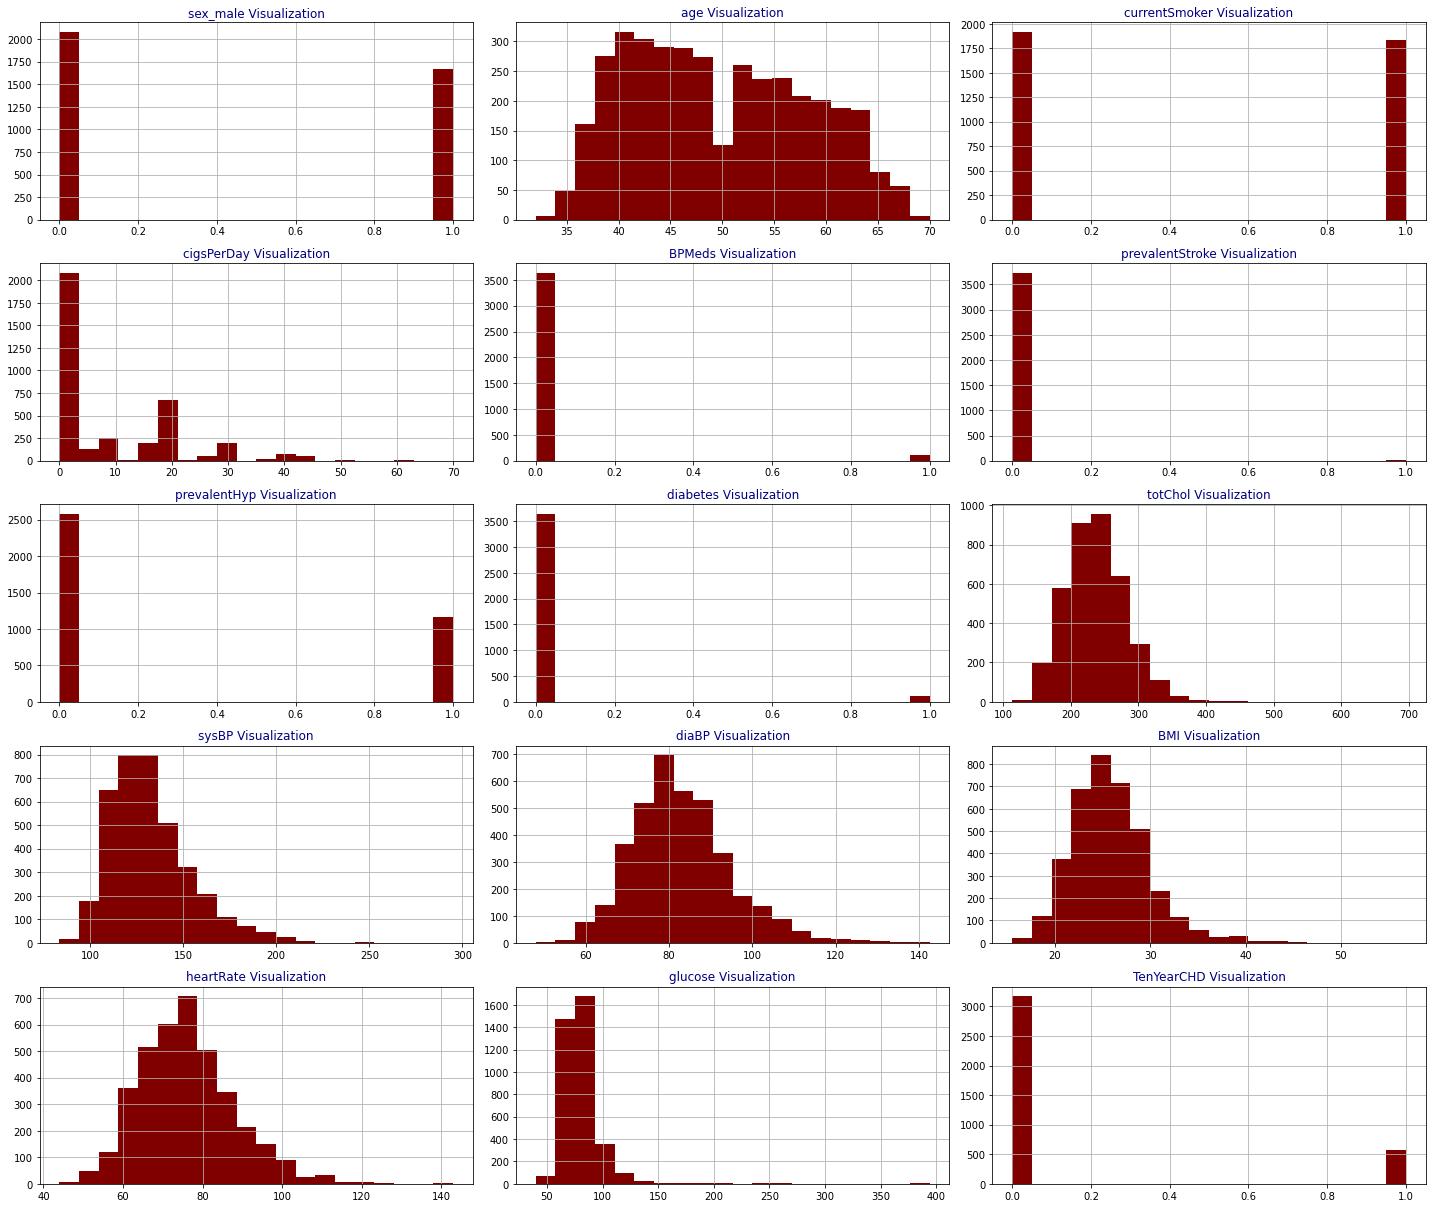

In [10]:
draw_chd_histograms(chd_df,chd_df.columns,6,3)

In [11]:
chd_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

Therefore, there are 572 patients with risk of heart disease and 3177 patents with no heart disease.


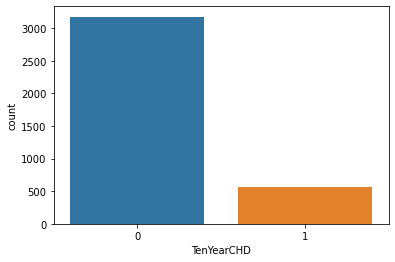

In [12]:
sn.countplot(x='TenYearCHD',data=chd_df)

print('Therefore, there are',(chd_df.TenYearCHD == 1).sum(),'patients with risk of heart disease and',(chd_df.TenYearCHD == 0).sum(),'patents with no heart disease.')

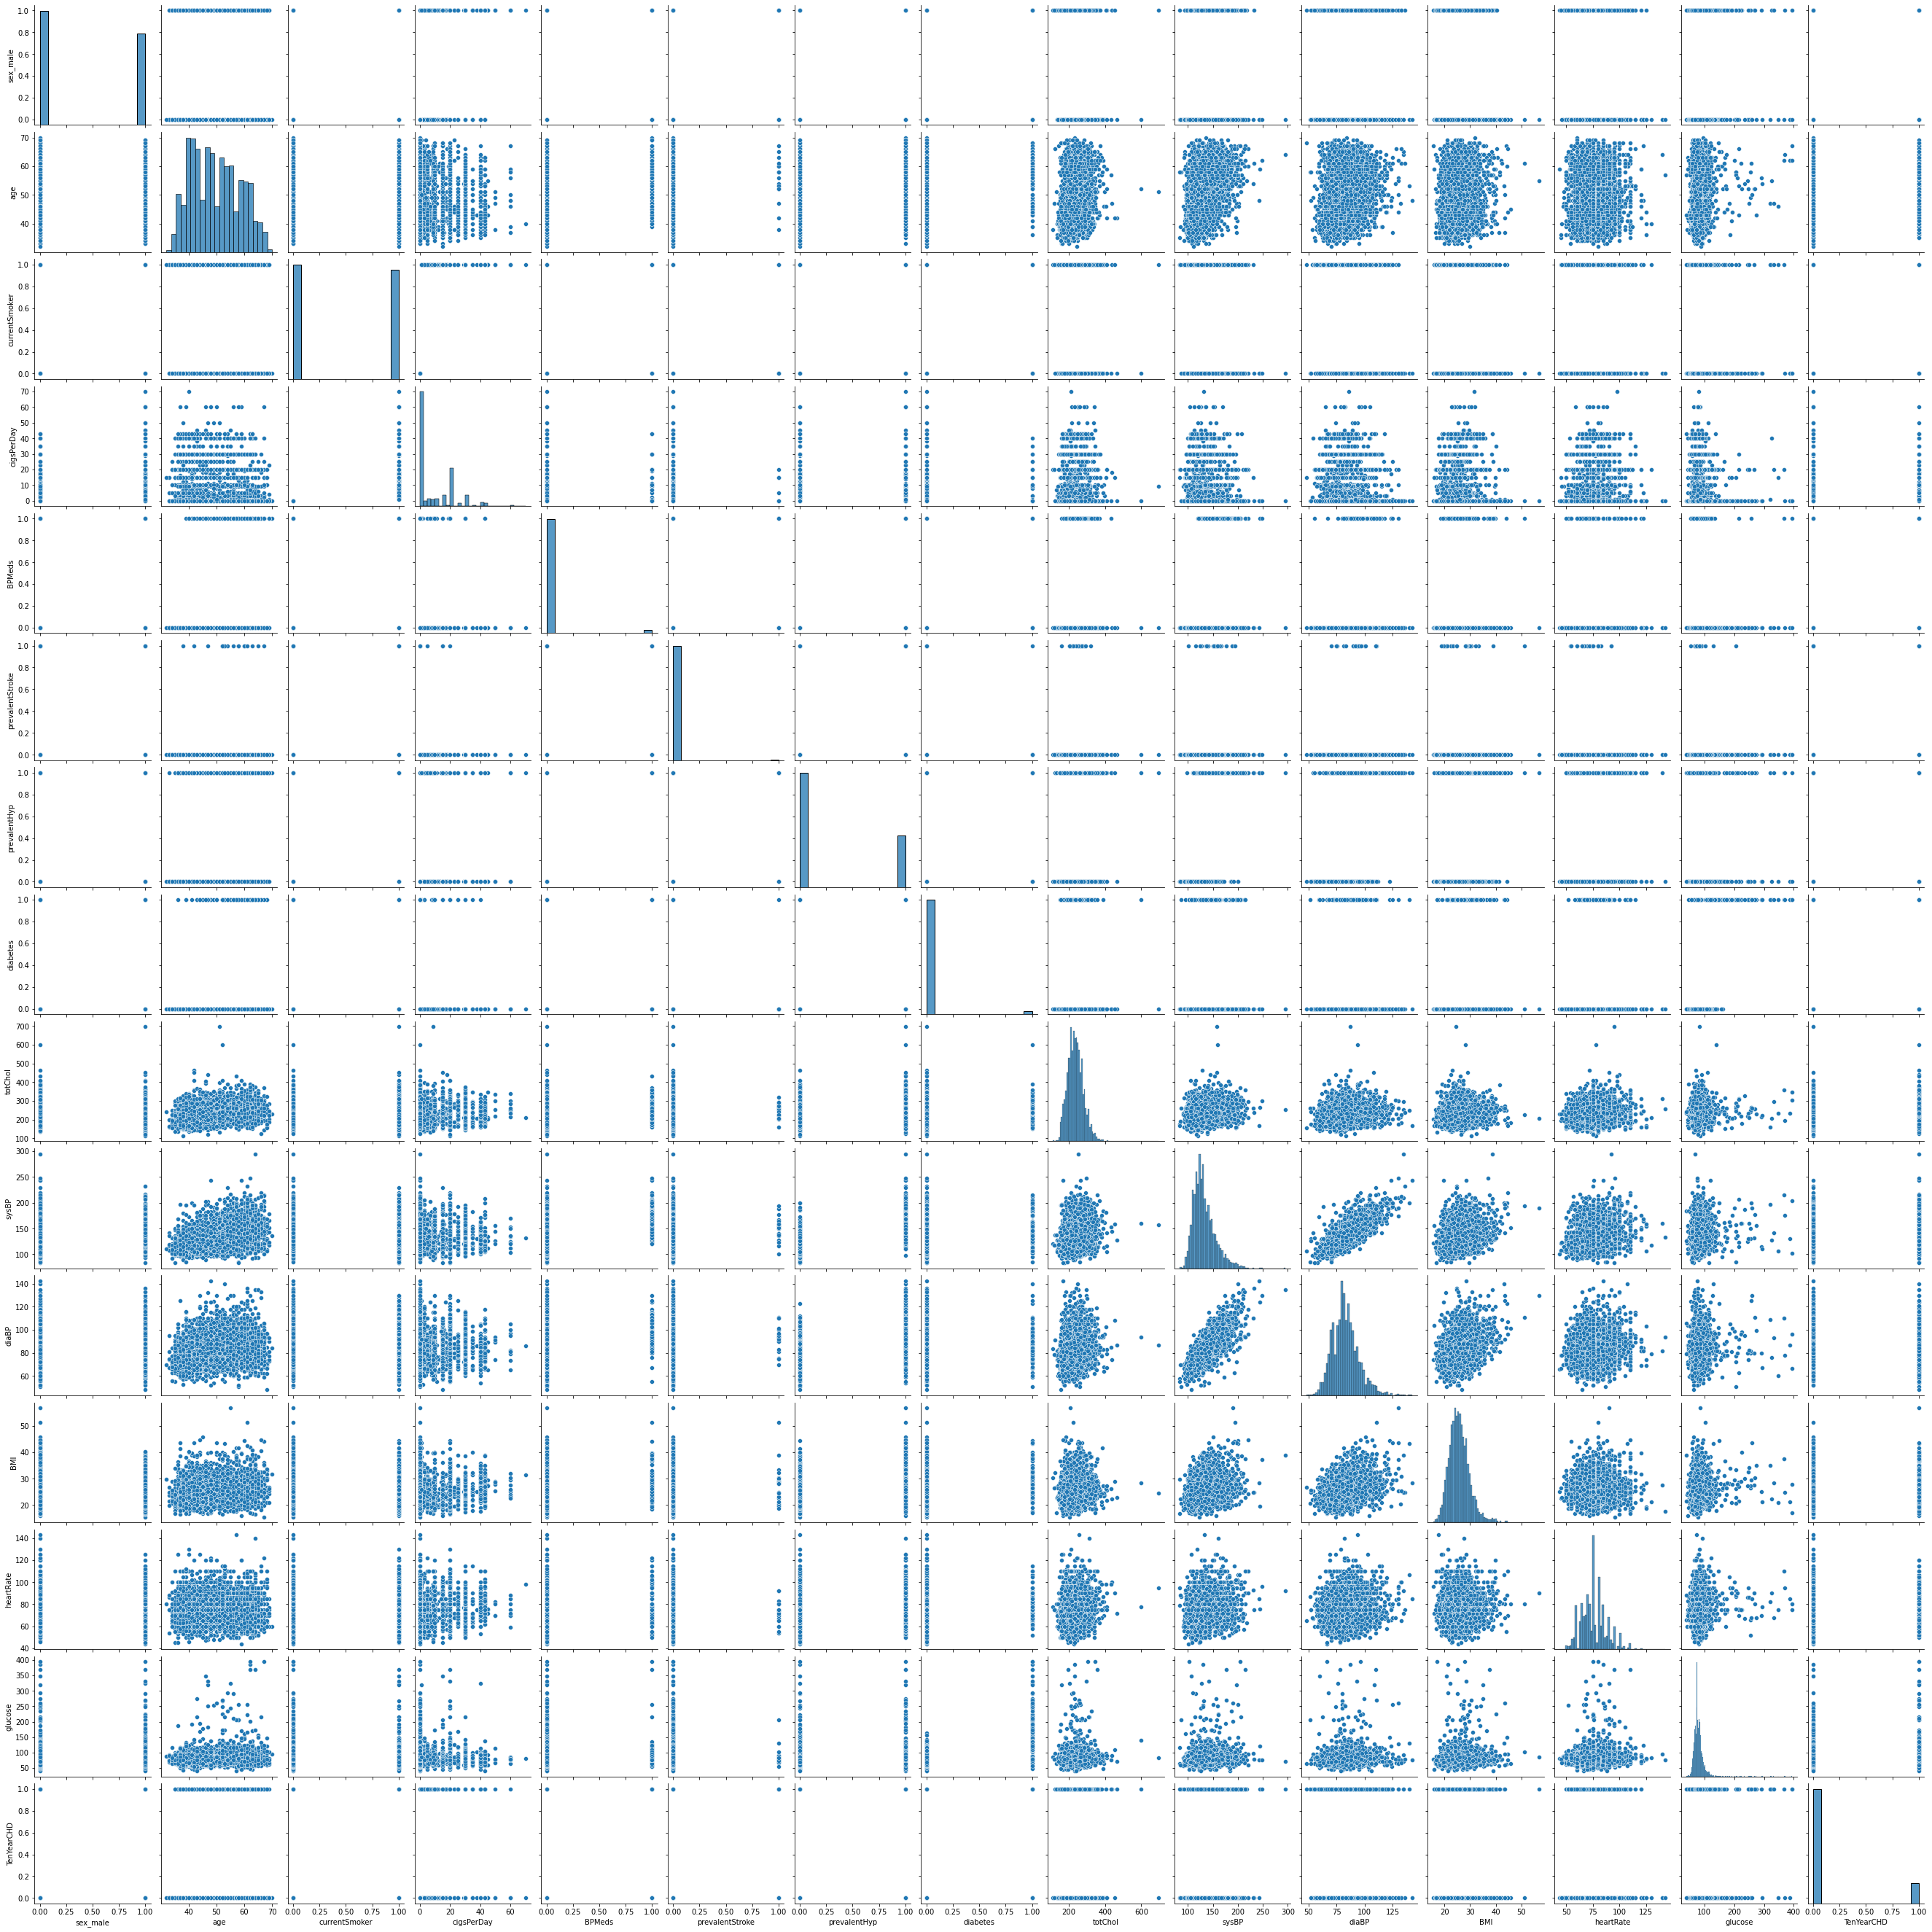

In [13]:
sn.pairplot(data=chd_df)

In [14]:
chd_df.describe()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# IT19138732 - Logistic Regression

Text(0.5, 1.0, 'Age vs Systolic Blood Pressure')

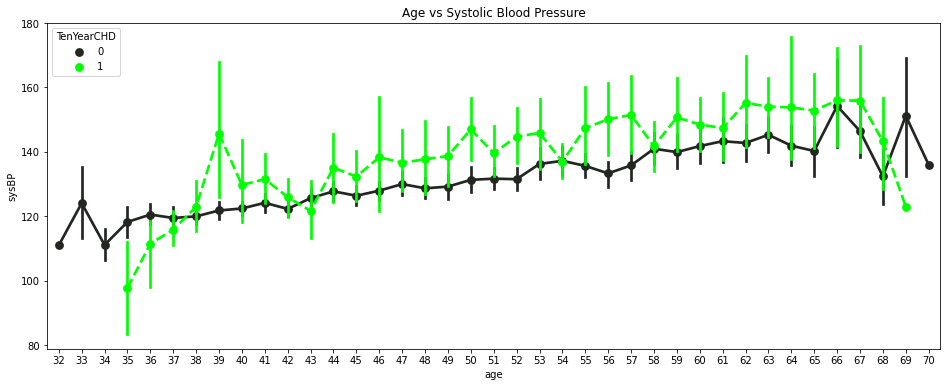

In [30]:
#Danuka
fig,ax=plt.subplots(figsize=(16,6))
sn.pointplot(x='age',y='sysBP',data=chd_df,color='Lime',hue='TenYearCHD',linestyles=["-", "--"])
plt.title('Age vs Systolic Blood Pressure')
#People with heart disease tend to have higher

Text(0.5, 1.0, 'Age vs Continuous Heart Rate')

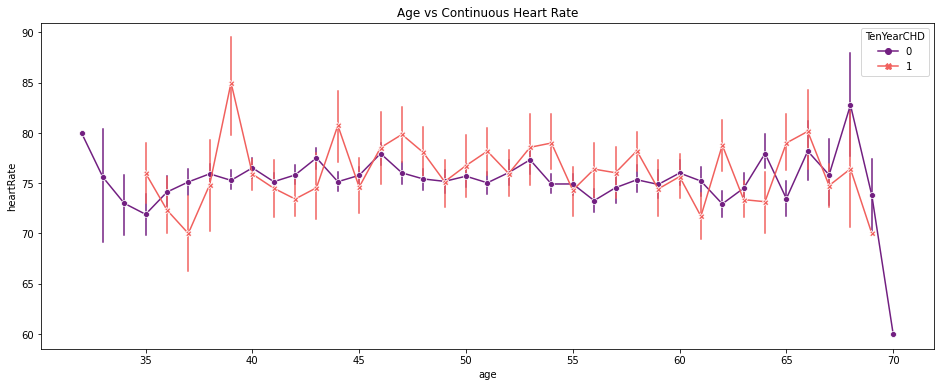

In [31]:
#Danuka
fig,ax=plt.subplots(figsize=(16,6))
sn.lineplot(y='heartRate',x='age',data=chd_df,hue="TenYearCHD",style='TenYearCHD',palette='magma',markers=True, dashes=False,err_style="bars", ci=68)
plt.title('Age vs Continuous Heart Rate')

In [15]:
from statsmodels.tools import add_constant as add_constant
heart_details_constant = add_constant(chd_df)
heart_details_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
col=heart_details_constant.columns[:-1]
hd_model=sm.Logit(chd_df.TenYearCHD,heart_details_constant[col])
lr_result=hd_model.fit()
lr_result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1169
Time:                        09:56:08   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
sex_male            0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
col=heart_details_constant.columns[:-1]
hd_model=sm.Logit(chd_df.TenYearCHD,heart_details_constant[col])
lr_result=hd_model.fit()
lr_result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1169
Time:                        09:56:08   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
sex_male            0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

In [17]:
def backward_elemination (hd_frame,dependent_var,column_list):
    while len(column_list)>0 :
        model=sm.Logit(dependent_var,hd_frame[column_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            column_list=column_list.drop(largest_pvalue.index)

result=backward_elemination(heart_details_constant,chd_df.TenYearCHD,col)

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1148
Time:                        09:56:10   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
sex_male       0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

In [19]:
hd_params = np.exp(result.params)
conf_intervals = np.exp(result.conf_int())
conf_intervals['OR'] = hd_params
pvalue=round(result.pvalues,3)
conf_intervals['pvalue']=pvalue
conf_intervals.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf_intervals))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000044       0.000274    0.000109   0.000
sex_male        1.454877       2.198166    1.788313   0.000
age             1.054409       1.080897    1.067571   0.000
cigsPerDay      1.011730       1.028128    1.019896   0.000
totChol         1.000150       1.004386    1.002266   0.036
sysBP           1.013299       1.021791    1.017536   0.000
glucose         1.004343       1.010895    1.007614   0.000


In [41]:
#Nimesha
import sklearn
new_hd_features=chd_df[['age','sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_hd_features.iloc[:,:-1]
y=new_hd_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
print(x_train,x_test,y_train,y_test)

      age  sex_male  cigsPerDay  totChol  sysBP  glucose
1820   55         0         5.0    280.0  144.0     75.0
2979   45         0         0.0    258.0  148.5     90.0
3247   51         1        40.0    212.0  122.5     74.0
1191   60         1        20.0    260.0  178.0     79.0
146    59         0         1.0    259.0  141.0     86.0
...   ...       ...         ...      ...    ...      ...
3612   49         0         0.0    308.0  128.0     70.0
3452   42         0         9.0    195.0  126.0     77.0
1944   39         0         0.0    220.0  137.5     88.0
2549   64         0         0.0    266.0  166.0     87.0
3306   56         1         0.0    193.0  114.0     88.0

[2999 rows x 6 columns]       age  sex_male  cigsPerDay  totChol  sysBP  glucose
3886   65         1         0.0    205.0  106.0     87.0
3026   66         0         0.0    273.0  197.0     80.0
4045   56         1         0.0    177.0  124.0     88.0
2923   43         1        30.0    252.0  112.0     65.0
2167  

In [42]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()
logistic_reg.fit(x_train,y_train)
y_prediction=logistic_reg.predict(x_test)
print(y_prediction)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

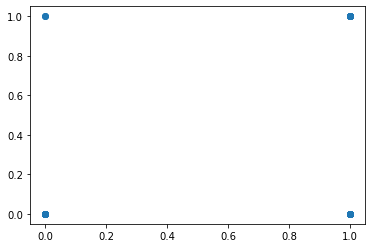

In [52]:
plt.scatter(y_test, y_prediction)

(array([  2.,   0.,   0.,   0.,   0., 653.,   0.,   0.,   0.,  95.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

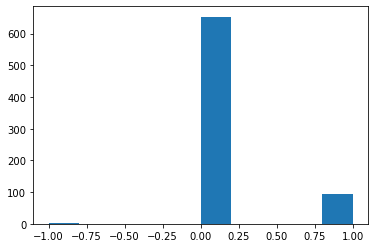

In [53]:
plt.hist(y_test - y_prediction)